1. The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}



$m_1 = 1-m$, 

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$


 Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where 

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \sqrt{1-k^2\sin^2\phi}\mathrm{d\phi} 
\end{equation}




\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

$
a) Aφ(r = 1.1, θ) vs. θ. \\
b) Aφ(r, θ = π∕3) vs. r
$

#Resolver el punto b

In [1]:
# Bibliotecas.
import numpy as np
import matplotlib.pylab as plt
from scipy import integrate

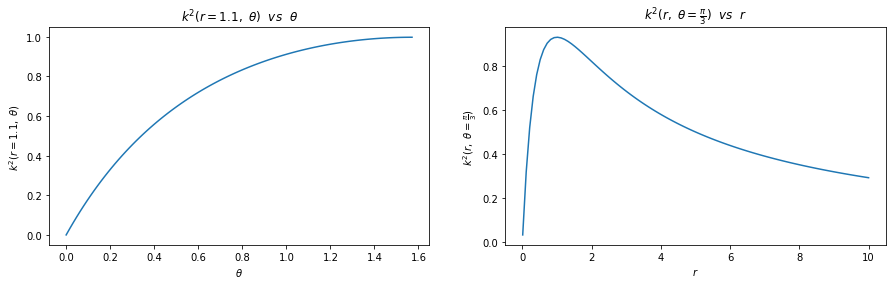

In [2]:
# Constantes.

a, I, r  = 1, 3, 1.1
# Definir cunción k^2.

def k_square(a, r, theta):
  k_square_return = (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2*a*r*np.sin(theta))
  return k_square_return 

# Graficar el comportamiento de k^2 respecto a theta y r

plt.figure(figsize=(15, 4))
plt.subplot(121)
theta = np.linspace(0, np.pi/2, 100)
plt.plot(theta, k_square(a, r, theta))
plt.xlabel(r"$\theta$")
plt.ylabel(r"$k^2(r=1.1,~\theta)$")
plt.title(r"$k^2(r=1.1,~\theta)~~vs~~\theta$")
plt.subplot(122)
r = np.linspace(0.01,10,100)
plt.plot(r, k_square(a, r, np.pi/3))
plt.xlabel(r"$r$")
plt.ylabel(r"$k^2(r,~\theta=\frac{\pi}{3})$")
plt.title(r"$k^2(r,~\theta=\frac{\pi}{3})~~vs~~r$")
plt.show()



## Integrando de $K(k):$

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
Integrando = \frac{1}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

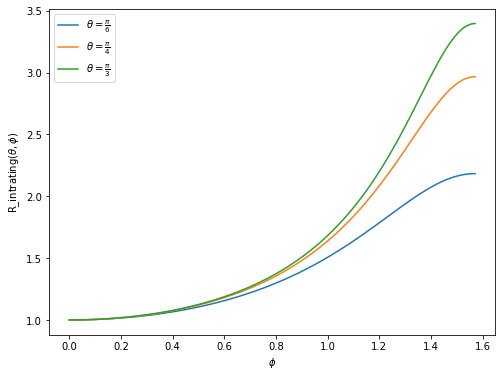

In [3]:
# Integrando de K

K_integrand = lambda k, phi: 1 / (np.sqrt(1 - k**2 * np.sin(phi)**2))

# Comportamiento grafico del integrando para un angulo theta = pi/6 , pi/4, pi/3 

phi = np.linspace(0,np.pi/2, 100  )

# Angulos theta
theta_1 = np.pi/6
theta_2 = np.pi/4
theta_3 = np.pi/3
 
# k^2 para cada angulo.

k_square_1 = k_square(1.1, theta_1, 1) 
k_square_2 = k_square(1.1, theta_2, 1) 
k_square_3 = k_square(1.1, theta_3, 1) 

# Graficas.

plt.figure(figsize=(8,6))
plt.plot(phi, K_integrand(np.sqrt(k_square_1), phi), label=r"$\theta = \frac{\pi}{6}$")
plt.plot(phi, K_integrand(np.sqrt(k_square_2), phi), label=r"$\theta = \frac{\pi}{4}$")
plt.plot(phi, K_integrand(np.sqrt(k_square_3), phi), label=r"$\theta = \frac{\pi}{3}$")
plt.ylabel(r"R_intrating($\theta,\phi$)")
plt.xlabel(r"$\phi$")
plt.legend()
plt.show()


## Factor de $E(k):$

\begin{equation}
E(k)=\int_{0}^{\pi/2} \sqrt{1-k^2\sin^2\phi}\mathrm{d\phi} 
\end{equation}

\begin{equation}
Integrando = \sqrt{1-k^2\sin^2\phi}
\end{equation}

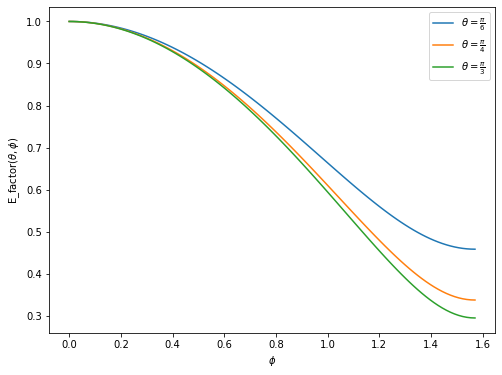

In [4]:
E_integrand = lambda k, phi: np.sqrt(1 - k**2 * np.sin(phi)**2)

# Comportamiento grafico del integrando para un angulo theta = pi/6 , pi/4, pi/3 

# Angulos theta
theta_1 = np.pi/6
theta_2 = np.pi/4
theta_3 = np.pi/3
 
# k^2 para cada angulo.

k_square_1 = k_square(1.1, theta_1, 1) 
k_square_2 = k_square(1.1, theta_2, 1) 
k_square_3 = k_square(1.1, theta_3, 1) 

# Graficas.

plt.figure(figsize=(8,6))
plt.plot(phi, E_integrand(np.sqrt(k_square_1), phi), label=r"$\theta = \frac{\pi}{6}$")
plt.plot(phi, E_integrand(np.sqrt(k_square_2), phi), label=r"$\theta = \frac{\pi}{4}$")
plt.plot(phi, E_integrand(np.sqrt(k_square_3), phi), label=r"$\theta = \frac{\pi}{3}$")
plt.ylabel(r"E_factor($\theta,\phi$)")
plt.xlabel(r"$\phi$")
plt.legend()
plt.show()


## Potencial.

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

In [5]:
# Crear la función potencial.

def potencial(r, I, a, theta, phi, u_0 ):

  k = k_square(a, r, theta)

  T1 = u_0/(4*np.pi)
  
  T21 = 4*I*a
  T22 = np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta))
  T2 = T21/T22  

  T31 = (2 - k)
  T32 = integrate.trapz(K_integrand(np.sqrt(k), phi),phi) 
  T33 = 2*integrate.trapz(E_integrand(np.sqrt(k), phi),phi)
  T3 = T31*T32 - T33

  return T1*T2*(T3/k)

## Solución a.
a = 1, I = 3, and μ0∕4π = 1

$
a) Aφ(r = 1.1, θ) vs. θ. \\
$

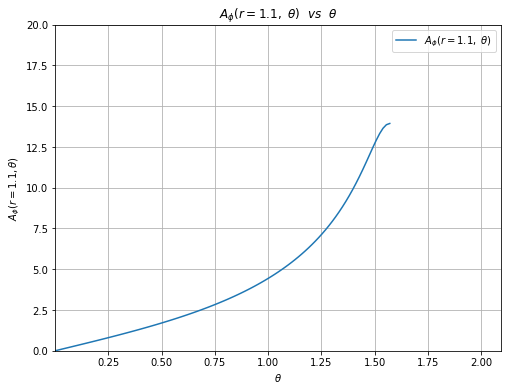

In [6]:
r = 1.1 # Punto donde calcular el potencial 
a = 1.0 # Radio de la espira, unidades computacionales
I = 3.0 #Corriente que circula por la espira, unidades computacionales
N = 100 # Numero o resolución en theta y phi


theta = np.linspace(0.0001, np.pi/2, N)
phi = np.linspace(0, np.pi/2, N)

Ap = np.zeros(len(theta))

for i, t in enumerate(theta):
    Ap[i] = potencial(r, I, a, t, phi, 4*np.pi)

plt.figure(figsize=(8,6))
plt.plot(theta, Ap, label=r"$A_\phi(r=1.1,~\theta)$")
plt.xlim(0.0001, np.pi*(2/3))
plt.ylim(0,20)
plt.title(r"$A_\phi(r=1.1,~\theta)~~vs~~\theta$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$A_\phi(r=1.1, \theta)$")
plt.legend()
plt.grid()
plt.show()



## Solución b.
a = 1, I = 3, and μ0∕4π = 1

$
b) Aφ(r, θ = π∕3) vs. r\\
$

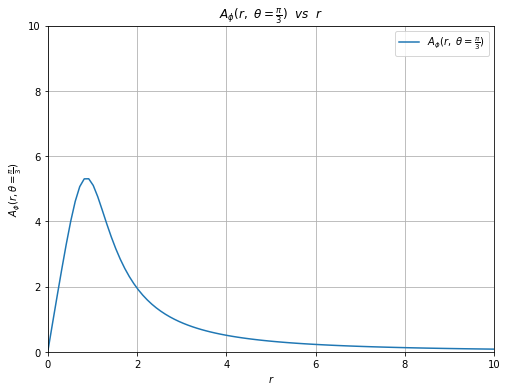

In [7]:
theta = np.pi/3 # Angulo respecto a z
a = 1.0 # Radio de la espira, unidades computacionales
I = 3.0 #Corriente que circula por la espira, unidades computacionales
N = 100 # Numero o resolución en r y phi


r = np.linspace(0.01,10, N)
phi = np.linspace(0, np.pi/2, N)

Rp = np.zeros(len(r))


for i, t in enumerate(r):
    Rp[i] = potencial(t, I, a, theta, phi, 4*np.pi)

plt.figure(figsize=(8,6))
plt.plot(r, Rp, label=r"$A_\phi(r,~\theta=\frac{\pi}{3})$")
plt.xlim(0, 10)
plt.ylim(0,10)
plt.title(r"$A_\phi(r,~\theta=\frac{\pi}{3})~~vs~~r$")
plt.xlabel(r"$r$")
plt.ylabel(r"$A_\phi(r, \theta=\frac{\pi}{3})$")
plt.legend()
plt.grid()
plt.show()

